# 1.Importing All the Necessary Libraries


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib


In [3]:
!pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# 2.Understanding The Datasets

#  Hourly Energy Consumption
   Over 10 years of hourly energy consumption data from PJM in Megawatts
   PJM is a regional transmission organization (RTO) that coordinates the movement of wholesale electricity in all or parts of 13 states and the District of Columbia.

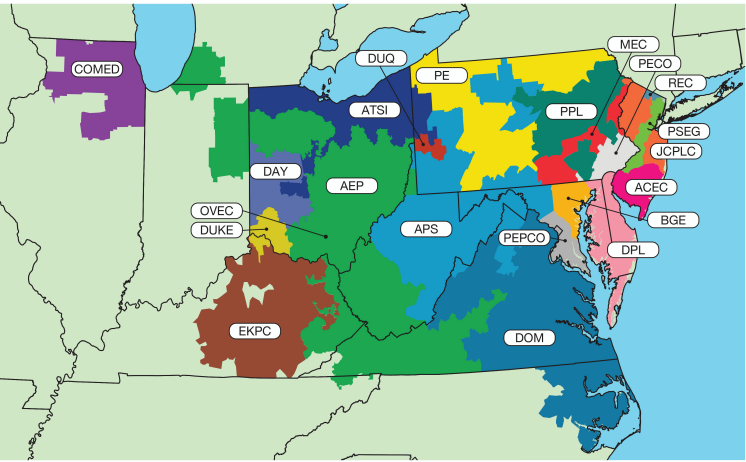

# Importing Data :

In [5]:
aep = pd.read_csv("AEP_hourly.csv")
comed = pd.read_csv("COMED_hourly.csv")
dayton = pd.read_csv("DAYTON_hourly.csv")
deok = pd.read_csv("DEOK_hourly.csv")
dom = pd.read_csv("DOM_hourly.csv")
duq = pd.read_csv("DUQ_hourly.csv")
ekpc = pd.read_csv("EKPC_hourly.csv")
fe = pd.read_csv("FE_hourly.csv")
ni = pd.read_csv("NI_hourly.csv")
pjm_load = pd.read_csv("PJM_Load_hourly.csv")
pjme = pd.read_csv("PJME_hourly.csv")
pjmw = pd.read_csv("PJMW_hourly.csv")


# Assembling the Dataframe


Since our dataset is somewhat fragmented across multliple separate files, we need to combine all the fragments together .

1.Adding a column to represent the zone 


In [6]:
aep['Zone'] = 'AEP'
comed['Zone'] = 'COMED'
dayton['Zone'] = 'DAYTON'
deok['Zone'] = 'DEOK'
dom['Zone'] = 'DOM'
duq['Zone'] = 'DUQ'
ekpc['Zone'] = 'EKPC'
fe['Zone'] = 'FE'
ni['Zone'] = 'NI'
pjm_load['Zone'] = 'PJM'
pjme['Zone'] = 'PJME'
pjmw['Zone'] = 'PJMW'


2. Renaming the energy cosumption column for each zone to a common name 



In [7]:
aep = aep.rename( columns={'AEP_MW': 'energy_consumption_MW'} )
comed = comed.rename( columns={'COMED_MW': 'energy_consumption_MW'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'energy_consumption_MW'} )
deok = deok.rename( columns={'DEOK_MW': 'energy_consumption_MW'} )
dom = dom.rename( columns={'DOM_MW': 'energy_consumption_MW'} )
duq = duq.rename( columns={'DUQ_MW': 'energy_consumption_MW'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'energy_consumption_MW'} )
fe = fe.rename( columns={'FE_MW': 'energy_consumption_MW'} )
ni = ni.rename( columns={'NI_MW': 'energy_consumption_MW'} )
pjm_load = pjm_load.rename( columns={'PJM_Load_MW': 'energy_consumption_MW'} )
pjme = pjme.rename( columns={'PJME_MW': 'energy_consumption_MW'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'energy_consumption_MW'} )


3.Assembling the Dataframe

In [8]:
df = pd.concat([aep,comed,dayton,deok,dom,duq,ekpc,fe,ni,pjm_load,pjme,pjmw])
# making a copy in case we make a miskate 

df_Reserve = df.copy()

df3=df.copy()
df_Reserve.columns

Index(['Datetime', 'energy_consumption_MW', 'Zone'], dtype='object')

4. Viewing and Inspecting our Data

In [9]:
df.head(10)

,Datetime,energy_consumption_MW,Zone
0,2004-12-31 01:00:00,13478.0,AEP
1,2004-12-31 02:00:00,12865.0,AEP
2,2004-12-31 03:00:00,12577.0,AEP
3,2004-12-31 04:00:00,12517.0,AEP
4,2004-12-31 05:00:00,12670.0,AEP
5,2004-12-31 06:00:00,13038.0,AEP
6,2004-12-31 07:00:00,13692.0,AEP
7,2004-12-31 08:00:00,14297.0,AEP
8,2004-12-31 09:00:00,14719.0,AEP
9,2004-12-31 10:00:00,14941.0,AEP


In [10]:
df.sample(10)

,Datetime,energy_consumption_MW,Zone
45399,2010-10-26 04:00:00,1251.0,DUQ
47429,2017-08-04 09:00:00,3474.0,DEOK
43952,2010-08-28 20:00:00,13466.0,DOM
45789,2007-07-12 09:00:00,5388.0,PJMW
52372,2016-01-10 11:00:00,10799.0,COMED
90578,2015-05-03 20:00:00,10092.0,DOM
33913,2014-02-17 08:00:00,12228.0,COMED
111329,2017-07-20 15:00:00,20980.0,AEP
62292,2018-06-25 19:00:00,14688.0,COMED
57759,2017-05-31 21:00:00,11141.0,COMED


In [11]:
df.tail(10)

,Datetime,energy_consumption_MW,Zone
143196,2018-01-01 15:00:00,7475.0,PJMW
143197,2018-01-01 16:00:00,7514.0,PJMW
143198,2018-01-01 17:00:00,7747.0,PJMW
143199,2018-01-01 18:00:00,8213.0,PJMW
143200,2018-01-01 19:00:00,8328.0,PJMW
143201,2018-01-01 20:00:00,8401.0,PJMW
143202,2018-01-01 21:00:00,8373.0,PJMW
143203,2018-01-01 22:00:00,8238.0,PJMW
143204,2018-01-01 23:00:00,7958.0,PJMW
143205,2018-01-02 00:00:00,7691.0,PJMW


In [12]:
df.shape

(1090167, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090167 entries, 0 to 143205
Data columns (total 3 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Datetime               1090167 non-null  object 
 1   energy_consumption_MW  1090167 non-null  float64
 2   Zone                   1090167 non-null  object 
dtypes: float64(1), object(2)
memory usage: 33.3+ MB


In [14]:
# datetime column has object datatype. Let's change it into datetime format.

df['Datetime'] = pd.to_datetime(df['Datetime'])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090167 entries, 0 to 143205
Data columns (total 3 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Datetime               1090167 non-null  datetime64[ns]
 1   energy_consumption_MW  1090167 non-null  float64       
 2   Zone                   1090167 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.3+ MB


In [16]:
df.describe()

,energy_consumption_MW
count,1.090167e+06
mean,1.120959e+04
std,1.053440e+04
min,0.000000e+00
25%,2.455000e+03
50%,8.217000e+03
75%,1.466500e+04
max,6.200900e+04


In [17]:
df.describe(include = 'all')


C:\Users\DELL\AppData\Local\Temp\ipykernel_17808\3322035261.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,Datetime,energy_consumption_MW,Zone
count,1090167,1.090167e+06,1090167
unique,178258,NaN,12
top,2016-11-06 02:00:00,NaN,PJME
freq,20,NaN,145366
first,1998-04-01 01:00:00,NaN,NaN
last,2018-08-03 00:00:00,NaN,NaN
mean,NaN,1.120959e+04,NaN
std,NaN,1.053440e+04,NaN
min,NaN,0.000000e+00,NaN
25%,NaN,2.455000e+03,NaN


4. Handling Missing (null) Values


In [18]:
df.isna().sum()

Datetime                 0
energy_consumption_MW    0
Zone                     0
dtype: int64

In [19]:
df.corr()

,energy_consumption_MW
energy_consumption_MW,1.0


# Checking for Highest and Lowest consumption & Which Year


In [20]:
df3[df3['energy_consumption_MW'] == df3['energy_consumption_MW'].max()]


,Datetime,energy_consumption_MW,Zone
38695,2006-08-02 17:00:00,62009.0,PJME


In [21]:
df3[df3['energy_consumption_MW'] == df3['energy_consumption_MW'].min()]


,Datetime,energy_consumption_MW,Zone
5111,2011-06-01 01:00:00,0.0,FE


# Data visualization

In [22]:
df1=df.copy()

num_zone=df1.loc[:,'Zone'].value_counts().to_frame().reset_index()
num_zone.rename(columns={"index": "zone", "Zone": "number"})


,zone,number
0,PJME,145366
1,PJMW,143206
2,DAYTON,121275
3,AEP,121273
4,DUQ,119068
5,DOM,116189
6,COMED,66497
7,FE,62874
8,NI,58450
9,DEOK,57739


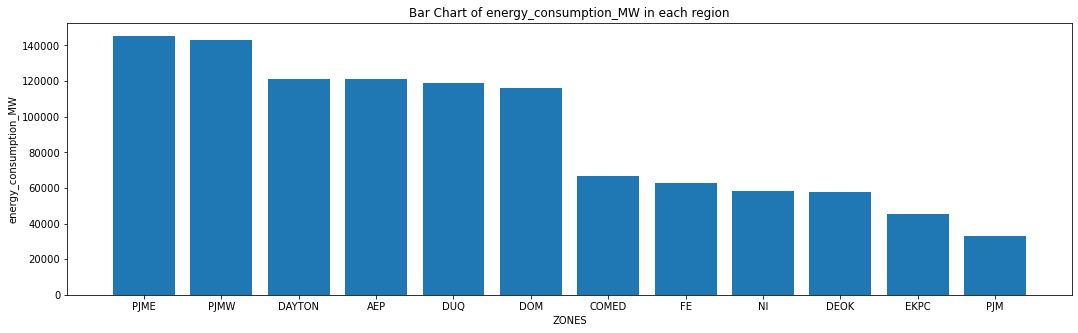

In [23]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)

#Creating the bar chart
plt.bar(num_zone['index'],num_zone['Zone'] )

#Adding the aesthetics

plt.title('Bar Chart of energy_consumption_MW in each region')
plt.xlabel('ZONES')
plt.ylabel('energy_consumption_MW')

#Show the plot
plt.show()

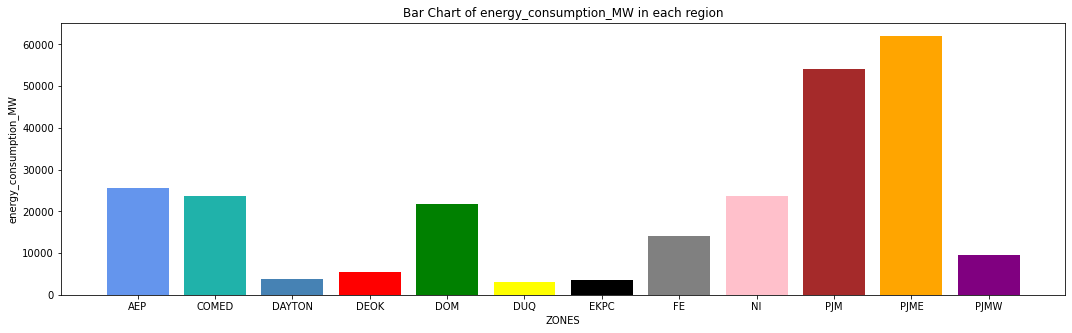

In [24]:
df =df.groupby('Zone')['energy_consumption_MW'].max().to_frame().reset_index()
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)

#Creating the bar chart
plt.bar(df['Zone'],df['energy_consumption_MW'],color=['cornflowerblue','lightseagreen','steelblue','red','green','yellow','black','gray','pink','brown','orange','purple'] )

#Adding the aesthetics

plt.title('Bar Chart of energy_consumption_MW in each region')
plt.xlabel('ZONES')
plt.ylabel('energy_consumption_MW')

#Show the plot
plt.show()

<AxesSubplot:xlabel='Zone', ylabel='energy_consumption_MW'>

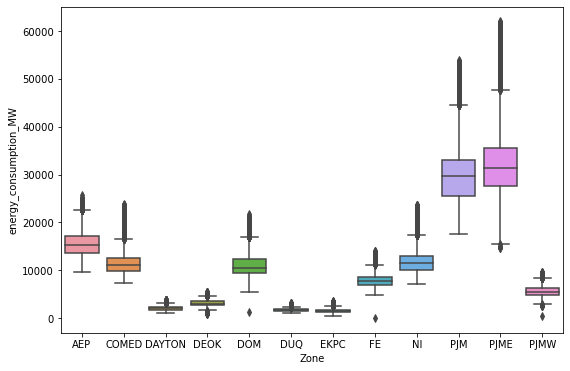

In [25]:
plt.figure(figsize=(9,6))
sb.boxplot( x= 'Zone', y='energy_consumption_MW' , data=df1 )

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy_consumption_MW', ylabel='Density'>

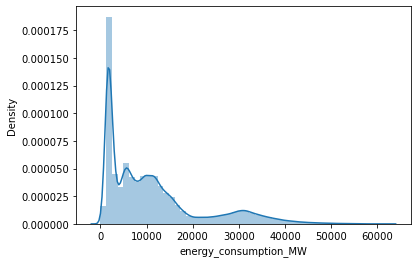

In [26]:
sb.distplot(df1['energy_consumption_MW'] )


### FEATURE ENGINEERING

In [27]:
df2 =df_Reserve.copy()
#df2['Datetime'] =pd.to_datetime(df2['Datetime'])
df2


,Datetime,energy_consumption_MW,Zone
0,2004-12-31 01:00:00,13478.0,AEP
1,2004-12-31 02:00:00,12865.0,AEP
2,2004-12-31 03:00:00,12577.0,AEP
3,2004-12-31 04:00:00,12517.0,AEP
4,2004-12-31 05:00:00,12670.0,AEP
...,...,...,...
143201,2018-01-01 20:00:00,8401.0,PJMW
143202,2018-01-01 21:00:00,8373.0,PJMW
143203,2018-01-01 22:00:00,8238.0,PJMW
143204,2018-01-01 23:00:00,7958.0,PJMW


# FEATURE ENGINEERING

In [28]:
df2['Datetime'] =pd.to_datetime(df2['Datetime'])
## date
df2['date'] = df2['Datetime'].dt.date
## year
df2['Year'] = df2['Datetime'].dt.year
## month
df2['Month'] = df2['Datetime'].dt.month
## hour_of_day:
df2['Hour'] = df2['Datetime'].dt.hour
# season:
# - Winter -> December (12), January (01) and February (02);
# - Spring -> March (03), April (04) and May (05);
# - Summer -> Jun (06), July (07) and August (08);
# - Autumn -> September (09), October (10) and November (11).
df2['Season'] = df2['Datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')
## day_of_week:

# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday
df2['weekday'] = df2['Datetime'].dt.weekday
df2['Day'] = df2['Datetime'].dt.day


df2['Weekend'] = df2['weekday'].apply( lambda x: 'Weekend' if x== 5 or x== 6 else 'Weekday')






# The column "date" is a datetime type columns, but it is like a object type column. I will change the type.
df2['date'] = pd.to_datetime( df2['date'] )





In [29]:

DF=df2.copy()
df2

,Datetime,energy_consumption_MW,Zone,date,Year,Month,Hour,Season,weekday,Day,Weekend
0,2004-12-31 01:00:00,13478.0,AEP,2004-12-31,2004,12,1,Winter,4,31,Weekday
1,2004-12-31 02:00:00,12865.0,AEP,2004-12-31,2004,12,2,Winter,4,31,Weekday
2,2004-12-31 03:00:00,12577.0,AEP,2004-12-31,2004,12,3,Winter,4,31,Weekday
3,2004-12-31 04:00:00,12517.0,AEP,2004-12-31,2004,12,4,Winter,4,31,Weekday
4,2004-12-31 05:00:00,12670.0,AEP,2004-12-31,2004,12,5,Winter,4,31,Weekday
...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,8401.0,PJMW,2018-01-01,2018,1,20,Winter,0,1,Weekday
143202,2018-01-01 21:00:00,8373.0,PJMW,2018-01-01,2018,1,21,Winter,0,1,Weekday
143203,2018-01-01 22:00:00,8238.0,PJMW,2018-01-01,2018,1,22,Winter,0,1,Weekday
143204,2018-01-01 23:00:00,7958.0,PJMW,2018-01-01,2018,1,23,Winter,0,1,Weekday


In [30]:
df2.sample(20)

,Datetime,energy_consumption_MW,Zone,date,Year,Month,Hour,Season,weekday,Day,Weekend
6300,2002-04-13 14:00:00,26991.0,PJME,2002-04-13,2002,4,14,Spring,5,13,Weekend
43569,2009-09-13 20:00:00,11786.0,NI,2009-09-13,2009,9,20,Autumn,6,13,Weekend
74844,2013-09-17 08:00:00,1823.0,DAYTON,2013-09-17,2013,9,8,Autumn,1,17,Weekday
64331,2018-04-01 18:00:00,9056.0,COMED,2018-04-01,2018,4,18,Spring,6,1,Weekend
78743,2013-01-06 19:00:00,1815.0,DUQ,2013-01-06,2013,1,19,Winter,6,6,Weekend
25328,2014-02-10 13:00:00,3836.0,DEOK,2014-02-10,2014,2,13,Winter,0,10,Weekday
37424,2006-06-26 18:00:00,6423.0,PJMW,2006-06-26,2006,6,18,Summer,0,26,Weekday
30458,2014-07-11 08:00:00,10215.0,COMED,2014-07-11,2014,7,8,Summer,4,11,Weekday
32352,2008-07-23 09:00:00,2260.0,DAYTON,2008-07-23,2008,7,9,Summer,2,23,Weekday
22165,2014-06-22 17:00:00,4251.0,DEOK,2014-06-22,2014,6,17,Summer,6,22,Weekend


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090167 entries, 0 to 143205
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Datetime               1090167 non-null  datetime64[ns]
 1   energy_consumption_MW  1090167 non-null  float64       
 2   Zone                   1090167 non-null  object        
 3   date                   1090167 non-null  datetime64[ns]
 4   Year                   1090167 non-null  int64         
 5   Month                  1090167 non-null  int64         
 6   Hour                   1090167 non-null  int64         
 7   Season                 1090167 non-null  object        
 8   weekday                1090167 non-null  int64         
 9   Day                    1090167 non-null  int64         
 10  Weekend                1090167 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 99.8+ MB


In [32]:
df_per = df2.select_dtypes(include=['int64'])
df_per=df_per.drop('Day' , axis=1)

df_per

,Year,Month,Hour,weekday
0,2004,12,1,4
1,2004,12,2,4
2,2004,12,3,4
3,2004,12,4,4
4,2004,12,5,4
...,...,...,...,...
143201,2018,1,20,0
143202,2018,1,21,0
143203,2018,1,22,0
143204,2018,1,23,0


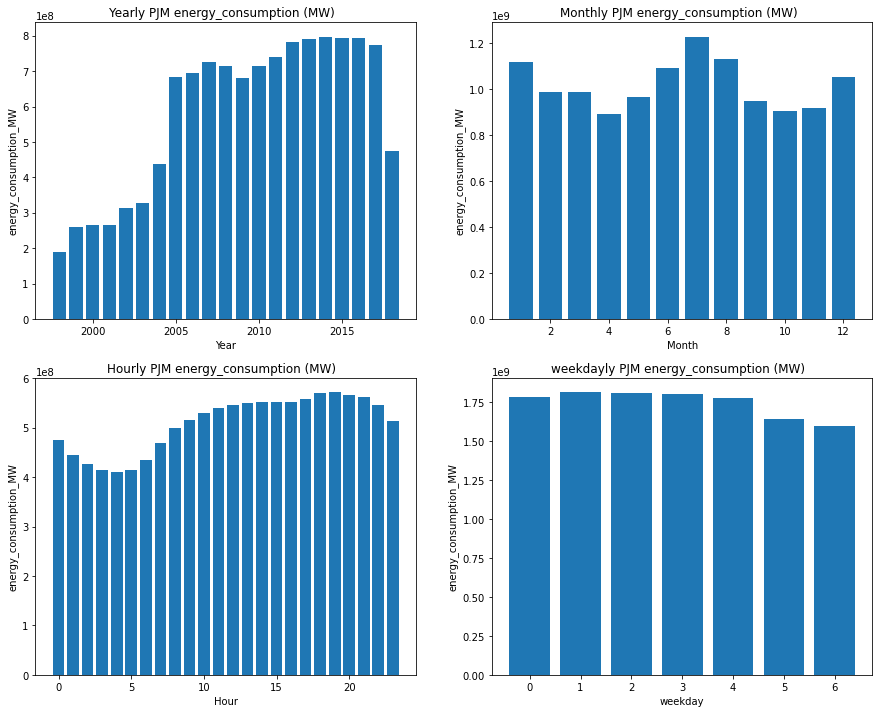

In [33]:
plt.figure(figsize=(15,12))
for i,per in enumerate(df_per.columns):
    df_per1 = DF.groupby(per)['energy_consumption_MW'].sum().to_frame().reset_index()
    plt.subplot(2,2,i+1)
    plt.bar(df_per1[per],df_per1['energy_consumption_MW'])
    plt.title(f'{per}ly PJM energy_consumption (MW)  ')
    plt.xlabel(per)
    plt.ylabel('energy_consumption_MW')

Text(0, 0.5, 'mw_energy_consumption')

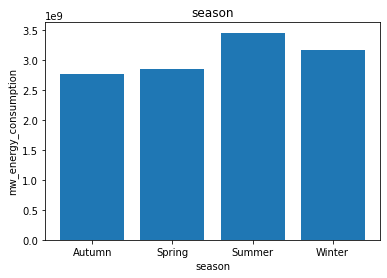

In [34]:
df_per2 = DF.groupby('Season')['energy_consumption_MW'].sum().to_frame().reset_index()
plt.bar(df_per2['Season'],df_per2['energy_consumption_MW'])
plt.title('season')
plt.xlabel('season')
plt.ylabel('mw_energy_consumption')

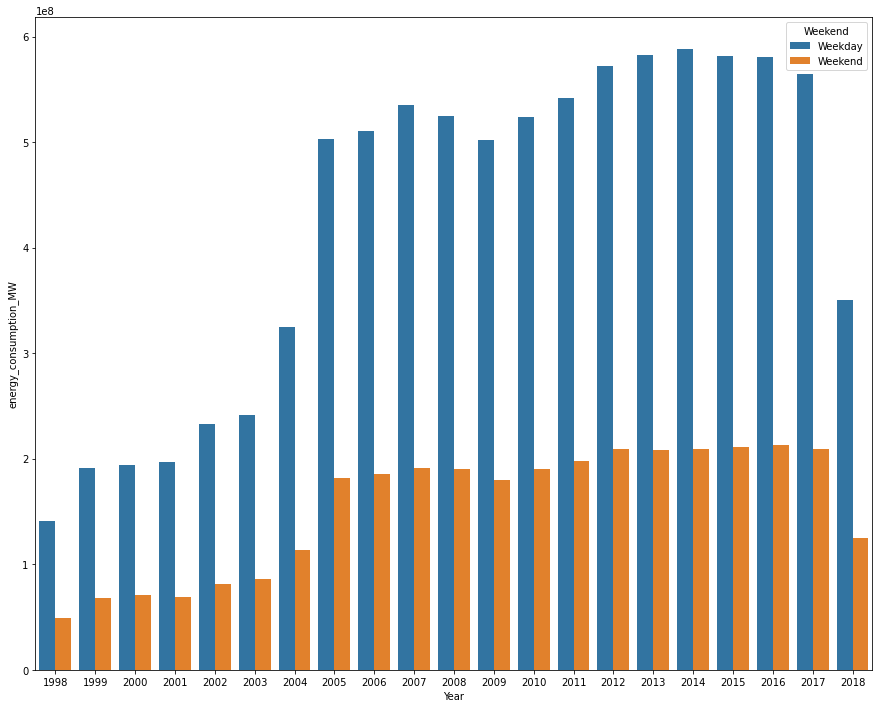

In [35]:
aux2 = df2[['Year', 'Weekend', 'energy_consumption_MW']].groupby( ['Year', 'Weekend'] ).sum().reset_index()

plt.figure(figsize=(15,12))
sb.barplot( x='Year', y='energy_consumption_MW', hue='Weekend', data=aux2 );

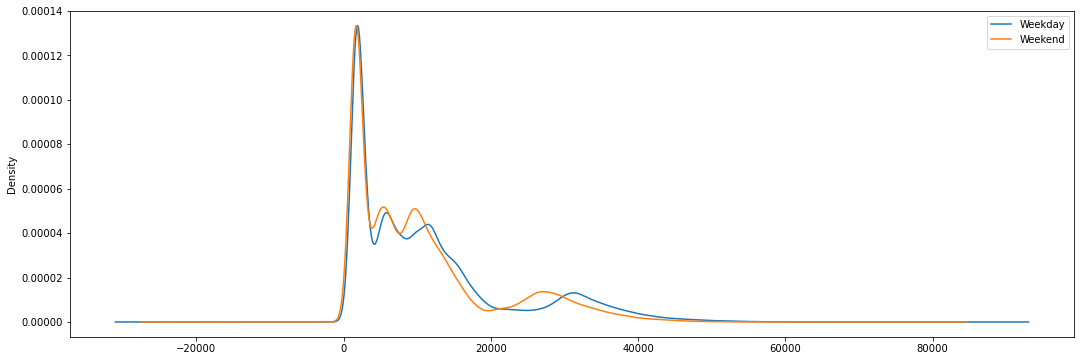

In [36]:


fig, ax = plt.subplots(figsize=(18,6))
for label, df in DF.groupby('Weekend'):
    df.energy_consumption_MW.plot(kind="kde", ax=ax, label=label)
plt.legend()

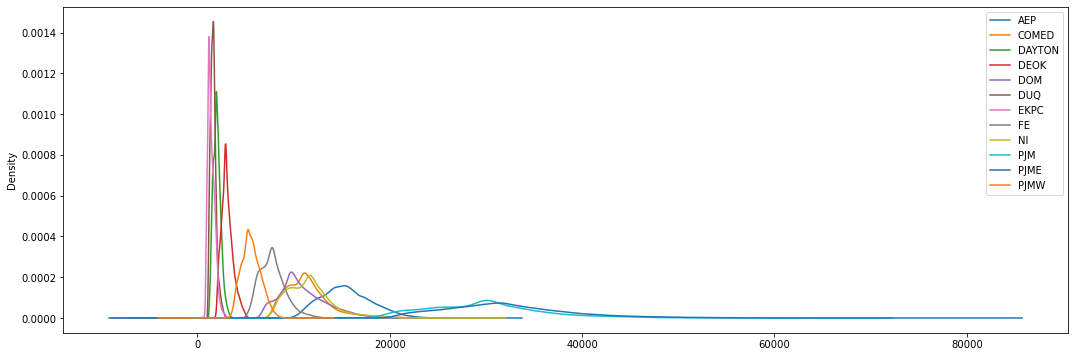

In [37]:
fig, ax = plt.subplots(figsize=(18,6))
for label, df in DF.groupby('Zone'):
    df.energy_consumption_MW.plot(kind="kde", ax=ax, label=label)
plt.legend()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy_consumption_MW'>

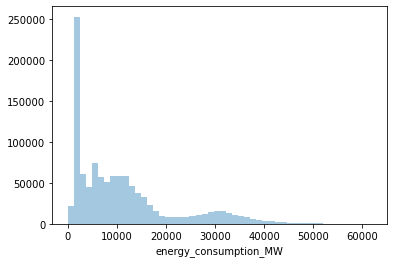

In [38]:
df4=df_Reserve.copy()
sb.distplot( df4['energy_consumption_MW'], kde=False )


# DATA PREPARATION

# First I will drop the columns that I will not use.


In [39]:
df5= df2.copy()

df5.drop("Weekend", axis=1,inplace=True)
df5.sort_values(by='Datetime' , inplace=True)
df5.sample(10)

,Datetime,energy_consumption_MW,Zone,date,Year,Month,Hour,Season,weekday,Day
31985,2005-05-08 01:00:00,22613.0,PJME,2005-05-08,2005,5,1,Spring,6,8
89152,2014-01-29 15:00:00,20343.0,AEP,2014-01-29,2014,1,15,Winter,2,29
33271,2015-10-16 12:00:00,7690.0,FE,2015-10-16,2015,10,12,Autumn,4,16
88419,2012-11-28 01:00:00,28081.0,PJME,2012-11-28,2012,11,1,Autumn,2,28
82178,2014-08-16 21:00:00,1613.0,DUQ,2014-08-16,2014,8,21,Summer,5,16
75463,2010-05-22 02:00:00,24792.0,PJME,2010-05-22,2010,5,2,Spring,5,22
110925,2017-05-06 16:00:00,1298.0,DUQ,2017-05-06,2017,5,16,Spring,5,6
119786,2018-03-03 02:00:00,14296.0,AEP,2018-03-03,2018,3,2,Spring,5,3
37349,2009-05-30 14:00:00,11490.0,DOM,2009-05-30,2009,5,14,Spring,5,30
12974,2014-02-08 16:00:00,1898.0,EKPC,2014-02-08,2014,2,16,Winter,5,8


# Transformation

In [40]:
s_dict = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
df5['Season'] = df5['Season'].map( s_dict )

In [41]:
df5.tail(10)


,Datetime,energy_consumption_MW,Zone,date,Year,Month,Hour,Season,weekday,Day
138094,2018-08-03,5489.0,PJMW,2018-08-03,2018,8,0,3,4,3
111077,2018-08-03,11385.0,DOM,2018-08-03,2018,8,0,3,4,3
116163,2018-08-03,2042.0,DAYTON,2018-08-03,2018,8,0,3,4,3
52627,2018-08-03,3281.0,DEOK,2018-08-03,2018,8,0,3,4,3
61385,2018-08-03,13335.0,COMED,2018-08-03,2018,8,0,3,4,3
140254,2018-08-03,35486.0,PJME,2018-08-03,2018,8,0,3,4,3
113956,2018-08-03,1656.0,DUQ,2018-08-03,2018,8,0,3,4,3
40222,2018-08-03,1448.0,EKPC,2018-08-03,2018,8,0,3,4,3
57762,2018-08-03,8198.0,FE,2018-08-03,2018,8,0,3,4,3
116161,2018-08-03,14809.0,AEP,2018-08-03,2018,8,0,3,4,3


I will create a table showing the minimum and the maximum date and
see if it will be possible to determine the same 6-month cut in the variable "date".

In [42]:

min_max = []
for i in df5['Zone'].unique():
    min_max.append( [ i, df5[df5['Zone']==i]['date'].min(), df5[df5['Zone']==i]['date'].max() ] )

# Creating de dataframe to better visualize.
mm = pd.DataFrame( columns=[ 'Zone', 'min_date', 'max_date' ], data=min_max )
mm

,Zone,min_date,max_date
0,PJM,1998-04-01,2002-01-01
1,PJME,2002-01-01,2018-08-03
2,PJMW,2002-04-01,2018-08-03
3,NI,2004-05-01,2011-01-01
4,AEP,2004-10-01,2018-08-03
5,DAYTON,2004-10-01,2018-08-03
6,DUQ,2005-01-01,2018-08-03
7,DOM,2005-05-01,2018-08-03
8,COMED,2011-01-01,2018-08-03
9,FE,2011-06-01,2018-08-03


Since we do not have the same minimum and maximum dates,
I will stipulate the minimum and maximum cutoffs for test and training dates for each one.
# Rules:
# - min_date <= TRAIN DATA < cut_date (max_date - 12 months)
# - cut_date (max_date - 12 months) <= TEST DATA <= max_date

 Determine the cutoff date at each zone.

In [43]:
df6=df5.copy()
from datetime import timedelta


In [44]:

cut_date =[]
for i in range( 0, 12 ):
    cut_date.append( [ df6['Zone'].unique()[i], df6[['Zone', 'date']].groupby( 'Zone' ).max().reset_index()['date'][i] - timedelta( days=12*30 ) ] )

# Creating de dataframe to better visualize.
cd = pd.DataFrame( columns=[ 'Zone', 'cut_date' ], data=cut_date )
cd

,Zone,cut_date
0,PJM,2017-08-08
1,PJME,2017-08-08
2,PJMW,2017-08-08
3,NI,2017-08-08
4,AEP,2017-08-08
5,DAYTON,2017-08-08
6,DUQ,2017-08-08
7,DOM,2017-08-08
8,COMED,2010-01-06
9,FE,2001-01-06


# Train-Test Split


In [45]:
# training dataset
X_train = df6[ ( ( (df6['Zone']=='AEP') 
                 |  (df6['Zone']=='COMED') 
                 | (df6['Zone']=='DAYTON') 
                 | (df6['Zone']=='DEOK') 
                 | (df6['Zone']=='DOM') 
                 | (df6['Zone']=='DUQ') 
                 | (df6['Zone']=='EKPC') 
                 | (df6['Zone']=='FE') 
                 | (df6['Zone']=='PJME') 
                 | (df6['Zone']=='PJMW') ) & (df6['date'] < '2017-08-08') ) 
                 | (df6['Zone']=='NI') & (df6['date'] < '2010-01-06') 
                 | (df6['Zone']=='PJM') & (df6['date'] < '2001-01-06') ]

y_train = X_train['energy_consumption_MW']

# test dataset
X_test = df6[ ( (  (df6['Zone']=='AEP') 
                 | (df6['Zone']=='COMED') 
                 | (df6['Zone']=='DAYTON') 
                 | (df6['Zone']=='DEOK') 
                 | (df6['Zone']=='DOM') 
                 | (df6['Zone']=='DUQ') 
                 | (df6['Zone']=='EKPC') 
                 | (df6['Zone']=='FE') 
                 | (df6['Zone']=='PJME') 
                 | (df6['Zone']=='PJMW') ) & (df6['date'] >= '2017-08-08') ) 
                 | (df6['Zone']=='NI') & (df6['date'] >= '2010-01-06') 
                 | (df6['Zone']=='PJM') & (df6['date'] >= '2001-01-06') ]

y_test = X_test['energy_consumption_MW']



In [46]:
df7=df6.copy()

# Transforming the variable "Zone"  from string to number

In [47]:

zone_dict = { 'AEP': 1, 'COMED': 2, 'DAYTON': 3, 'DEOK': 4, 'DOM': 5, 'DUQ': 6, 'EKPC': 7, 'FE': 8, 'NI': 9, 'PJM': 10, 'PJME': 11, 'PJMW': 12 }
X_train['Zone'] = X_train['Zone'].map( zone_dict )
X_test['Zone'] = X_test['Zone'].map( zone_dict );
testDF=X_test.copy()
trainDF=X_train.copy()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17808\1616279202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Zone'] = X_train['Zone'].map( zone_dict )
C:\Users\DELL\AppData\Local\Temp\ipykernel_17808\1616279202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Zone'] = X_test['Zone'].map( zone_dict );


In [48]:
trainDF= trainDF.set_index('Datetime')
trainDF

,energy_consumption_MW,Zone,date,Year,Month,Hour,Season,weekday,Day
Datetime,,,,,,,,,
1998-04-01 01:00:00,22259.0,10,1998-04-01,1998,4,1,2,2,1
1998-04-01 02:00:00,21244.0,10,1998-04-01,1998,4,2,2,2,1
1998-04-01 03:00:00,20651.0,10,1998-04-01,1998,4,3,2,2,1
1998-04-01 04:00:00,20421.0,10,1998-04-01,1998,4,4,2,2,1
1998-04-01 05:00:00,20713.0,10,1998-04-01,1998,4,5,2,2,1
...,...,...,...,...,...,...,...,...,...
2017-08-07 23:00:00,30077.0,11,2017-08-07,2017,8,23,3,0,7
2017-08-07 23:00:00,3124.0,4,2017-08-07,2017,8,23,3,0,7
2017-08-07 23:00:00,11646.0,5,2017-08-07,2017,8,23,3,0,7


In [49]:
trainDF.info()
trainDF.tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 986480 entries, 1998-04-01 01:00:00 to 2017-08-07 23:00:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   energy_consumption_MW  986480 non-null  float64       
 1   Zone                   986480 non-null  int64         
 2   date                   986480 non-null  datetime64[ns]
 3   Year                   986480 non-null  int64         
 4   Month                  986480 non-null  int64         
 5   Hour                   986480 non-null  int64         
 6   Season                 986480 non-null  int64         
 7   weekday                986480 non-null  int64         
 8   Day                    986480 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 75.3 MB


,energy_consumption_MW,Zone,date,Year,Month,Hour,Season,weekday,Day
Datetime,,,,,,,,,
2017-08-07 23:00:00,2047.0,3,2017-08-07,2017,8,23,3,0,7
2017-08-07 23:00:00,1326.0,7,2017-08-07,2017,8,23,3,0,7
2017-08-07 23:00:00,5346.0,12,2017-08-07,2017,8,23,3,0,7
2017-08-07 23:00:00,14390.0,1,2017-08-07,2017,8,23,3,0,7
2017-08-07 23:00:00,1514.0,6,2017-08-07,2017,8,23,3,0,7
2017-08-07 23:00:00,30077.0,11,2017-08-07,2017,8,23,3,0,7
2017-08-07 23:00:00,3124.0,4,2017-08-07,2017,8,23,3,0,7
2017-08-07 23:00:00,11646.0,5,2017-08-07,2017,8,23,3,0,7
2017-08-07 23:00:00,11634.0,2,2017-08-07,2017,8,23,3,0,7


In [50]:
FEATURES = ['Zone', 'Year', 'Month', 'Hour', 'Season', 'Day' ,'weekday']
TARGET = 'energy_consumption_MW'

In [51]:
x_tr = trainDF[FEATURES]
x_ts= testDF[FEATURES]


In [52]:
#x_tr=trainDF.drop('date' , axis= 1)
x_tr.shape ,x_ts.shape 

((986480, 7), (103687, 7))

In [53]:
#x_ts=testDF.drop('date' , axis= 1)



In [54]:
y_tr = trainDF[TARGET]
y_ts= testDF[TARGET]


In [55]:
#x_tr=x_tr.drop('energy_consumption_MW' , axis= 1)
#x_ts=x_ts.drop('energy_consumption_MW' , axis= 1)


# MACHINE LEARNING MODELLING

### 1.RandomForestRegressor

In [58]:
import xgboost as xg
from sklearn.ensemble      import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


In [59]:

from sklearn.metrics       import mean_absolute_error, mean_squared_error
from sklearn import metrics
# Now I'm going to start using a model that fits more with our dataset and one of the best and most used algorithms.

# model
rf = RandomForestRegressor( n_estimators=100, n_jobs=-1, random_state=42 ).fit( x_tr, y_tr )



In [60]:
testDF1=testDF.copy()
testDF1['prediction'] = rf.predict(x_ts)
#testDF1= testDF1.set_index('Datetime')
testDF1

,Datetime,energy_consumption_MW,Zone,date,Year,Month,Hour,Season,weekday,Day,prediction
32799,2001-01-06 00:00:00,31769.0,10,2001-01-06,2001,1,0,1,5,6,31662.44
32752,2001-01-06 01:00:00,29307.0,10,2001-01-06,2001,1,1,1,5,6,29993.32
32753,2001-01-06 02:00:00,28297.0,10,2001-01-06,2001,1,2,1,5,6,29564.41
32754,2001-01-06 03:00:00,27836.0,10,2001-01-06,2001,1,3,1,5,6,29305.47
32755,2001-01-06 04:00:00,27591.0,10,2001-01-06,2001,1,4,1,5,6,29289.31
...,...,...,...,...,...,...,...,...,...,...,...
140254,2018-08-03 00:00:00,35486.0,11,2018-08-03,2018,8,0,3,4,3,32834.16
113956,2018-08-03 00:00:00,1656.0,6,2018-08-03,2018,8,0,3,4,3,1741.17
40222,2018-08-03 00:00:00,1448.0,7,2018-08-03,2018,8,0,3,4,3,1416.07
57762,2018-08-03 00:00:00,8198.0,8,2018-08-03,2018,8,0,3,4,3,8333.46


In [61]:
score = np.sqrt(MSE(testDF1['energy_consumption_MW'], testDF1['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1963.84


In [62]:
zone_dict = [ 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI', 'PJM', 'PJME', 'PJMW']


In [63]:
for i in range(1,13):
    dfZoneT=testDF1[testDF1['Zone']== i]
    for zone in zone_dict:
        print("zone ", zone)
        break
    zone_dict=zone_dict[1:]
    score = np.sqrt(MSE(dfZoneT['energy_consumption_MW'], dfZoneT['prediction']))
    print(f'RMSE Score on Test set: {score:0.2f}')

zone  AEP
RMSE Score on Test set: 1833.57
zone  COMED
RMSE Score on Test set: 1674.15
zone  DAYTON
RMSE Score on Test set: 264.90
zone  DEOK
RMSE Score on Test set: 449.45
zone  DOM
RMSE Score on Test set: 1967.78
zone  DUQ
RMSE Score on Test set: 202.17
zone  EKPC
RMSE Score on Test set: 334.24
zone  FE
RMSE Score on Test set: 912.31
zone  NI
RMSE Score on Test set: 1738.50
zone  PJM
RMSE Score on Test set: 3313.15
zone  PJME
RMSE Score on Test set: 4520.29
zone  PJMW
RMSE Score on Test set: 745.08


### 2.Linear Regression Model

In [64]:
from sklearn.linear_model  import LinearRegression
lr = LinearRegression().fit( x_tr, y_tr )

In [65]:
testDF2=testDF.copy()
testDF2['prediction'] = lr.predict(x_ts)
#testDF2= testDF2.set_index('Datetime')
testDF2

,Datetime,energy_consumption_MW,Zone,date,Year,Month,Hour,Season,weekday,Day,prediction
32799,2001-01-06 00:00:00,31769.0,10,2001-01-06,2001,1,0,1,5,6,16903.629039
32752,2001-01-06 01:00:00,29307.0,10,2001-01-06,2001,1,1,1,5,6,17050.920345
32753,2001-01-06 02:00:00,28297.0,10,2001-01-06,2001,1,2,1,5,6,17198.211651
32754,2001-01-06 03:00:00,27836.0,10,2001-01-06,2001,1,3,1,5,6,17345.502957
32755,2001-01-06 04:00:00,27591.0,10,2001-01-06,2001,1,4,1,5,6,17492.794263
...,...,...,...,...,...,...,...,...,...,...,...
140254,2018-08-03 00:00:00,35486.0,11,2018-08-03,2018,8,0,3,4,3,8746.106329
113956,2018-08-03 00:00:00,1656.0,6,2018-08-03,2018,8,0,3,4,3,5107.207513
40222,2018-08-03 00:00:00,1448.0,7,2018-08-03,2018,8,0,3,4,3,5834.987276
57762,2018-08-03 00:00:00,8198.0,8,2018-08-03,2018,8,0,3,4,3,6562.767039


In [66]:
score = np.sqrt(MSE(testDF2['energy_consumption_MW'], testDF2['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 8941.16


In [67]:
  zone_dict = [ 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI', 'PJM', 'PJME', 'PJMW']

In [68]:
for i in range(1,13):
    dfZoneT=testDF2[testDF2['Zone']== i]
  
    for zone in zone_dict:
        print("zone ", zone)
        break
    zone_dict=zone_dict[1:]
    score = np.sqrt(MSE(dfZoneT['energy_consumption_MW'], dfZoneT['prediction']))
    print(f'RMSE Score on Test set: {score:0.2f}')

zone  AEP
RMSE Score on Test set: 11424.76
zone  COMED
RMSE Score on Test set: 7079.75
zone  DAYTON
RMSE Score on Test set: 3319.77
zone  DEOK
RMSE Score on Test set: 2976.08
zone  DOM
RMSE Score on Test set: 5241.72
zone  DUQ
RMSE Score on Test set: 5901.84
zone  EKPC
RMSE Score on Test set: 6677.51
zone  FE
RMSE Score on Test set: 1589.94
zone  NI
RMSE Score on Test set: 2667.70
zone  PJM
RMSE Score on Test set: 12945.99
zone  PJME
RMSE Score on Test set: 20904.02
zone  PJMW
RMSE Score on Test set: 6138.68


### 3.Linear Regression - Lasso -

In [69]:
from sklearn.linear_model  import Lasso
lrr = Lasso( alpha=0.00001 ).fit( x_tr, y_tr )

In [70]:
testDF3=testDF.copy()
testDF3['prediction'] = lrr.predict(x_ts)
#testDF2= testDF2.set_index('Datetime')
testDF3

,Datetime,energy_consumption_MW,Zone,date,Year,Month,Hour,Season,weekday,Day,prediction
32799,2001-01-06 00:00:00,31769.0,10,2001-01-06,2001,1,0,1,5,6,16903.629030
32752,2001-01-06 01:00:00,29307.0,10,2001-01-06,2001,1,1,1,5,6,17050.920335
32753,2001-01-06 02:00:00,28297.0,10,2001-01-06,2001,1,2,1,5,6,17198.211641
32754,2001-01-06 03:00:00,27836.0,10,2001-01-06,2001,1,3,1,5,6,17345.502947
32755,2001-01-06 04:00:00,27591.0,10,2001-01-06,2001,1,4,1,5,6,17492.794253
...,...,...,...,...,...,...,...,...,...,...,...
140254,2018-08-03 00:00:00,35486.0,11,2018-08-03,2018,8,0,3,4,3,8746.106336
113956,2018-08-03 00:00:00,1656.0,6,2018-08-03,2018,8,0,3,4,3,5107.207523
40222,2018-08-03 00:00:00,1448.0,7,2018-08-03,2018,8,0,3,4,3,5834.987286
57762,2018-08-03 00:00:00,8198.0,8,2018-08-03,2018,8,0,3,4,3,6562.767048


In [71]:
score = np.sqrt(MSE(testDF3['energy_consumption_MW'], testDF3['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 8941.16


In [72]:
  zone_dict = [ 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI', 'PJM', 'PJME', 'PJMW']

In [73]:
for i in range(1,13):
    dfZoneT=testDF1[testDF3['Zone']== i]
    for zone in zone_dict:
        print("zone ", zone)
        break
    zone_dict=zone_dict[1:]
    score = np.sqrt(MSE(dfZoneT['energy_consumption_MW'], dfZoneT['prediction']))
    print(f'RMSE Score on Test set: {score:0.2f}')

zone  AEP
RMSE Score on Test set: 1833.57
zone  COMED
RMSE Score on Test set: 1674.15
zone  DAYTON
RMSE Score on Test set: 264.90
zone  DEOK
RMSE Score on Test set: 449.45
zone  DOM
RMSE Score on Test set: 1967.78
zone  DUQ
RMSE Score on Test set: 202.17
zone  EKPC
RMSE Score on Test set: 334.24
zone  FE
RMSE Score on Test set: 912.31
zone  NI
RMSE Score on Test set: 1738.50
zone  PJM
RMSE Score on Test set: 3313.15
zone  PJME
RMSE Score on Test set: 4520.29
zone  PJMW
RMSE Score on Test set: 745.08


# 4.XGBoost Regressor

In [74]:
!pip install xgboost

In [75]:
reg = xg.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(x_tr, y_tr,
        eval_set=[(x_tr, y_tr), (x_ts, y_ts)],
        verbose=100)

[23:37:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:15272.47636	validation_1-rmse:14896.96651
[100]	validation_0-rmse:6490.88171	validation_1-rmse:6088.76836
[200]	validation_0-rmse:3664.48189	validation_1-rmse:3379.66989
[300]	validation_0-rmse:2869.81595	validation_1-rmse:2665.51756
[400]	validation_0-rmse:2537.74203	validation_1-rmse:2394.70558
[500]	validation_0-rmse:2348.86179	validation_1-rmse:2237.18932
[600]	validation_0-rmse:2226.01228	validation_1-rmse:2139.55771
[700]	validation_0-rmse:2145.95693	validation_1-rmse:2075.26204
[800]	validation_0-rmse:2090.17359	validation_1-rmse:2027.29820
[900]	validation_0-rmse:2049.74497	validation_1-rmse:1995.13837
[999]	validation_0-rmse:2018.33419	validation_1-rmse:1970.99786


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

# Feature Importance


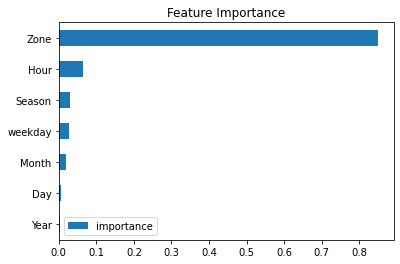

In [76]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [77]:
testDF['prediction'] = reg.predict(x_ts)
testDF= testDF.set_index('Datetime')
testDF


,energy_consumption_MW,Zone,date,Year,Month,Hour,Season,weekday,Day,prediction
Datetime,,,,,,,,,,
2001-01-06 00:00:00,31769.0,10,2001-01-06,2001,1,0,1,5,6,25942.453125
2001-01-06 01:00:00,29307.0,10,2001-01-06,2001,1,1,1,5,6,25565.371094
2001-01-06 02:00:00,28297.0,10,2001-01-06,2001,1,2,1,5,6,25160.173828
2001-01-06 03:00:00,27836.0,10,2001-01-06,2001,1,3,1,5,6,25127.669922
2001-01-06 04:00:00,27591.0,10,2001-01-06,2001,1,4,1,5,6,25127.669922
...,...,...,...,...,...,...,...,...,...,...
2018-08-03 00:00:00,35486.0,11,2018-08-03,2018,8,0,3,4,3,29667.007812
2018-08-03 00:00:00,1656.0,6,2018-08-03,2018,8,0,3,4,3,2374.959717
2018-08-03 00:00:00,1448.0,7,2018-08-03,2018,8,0,3,4,3,2374.959717


# Forecast on Test¶


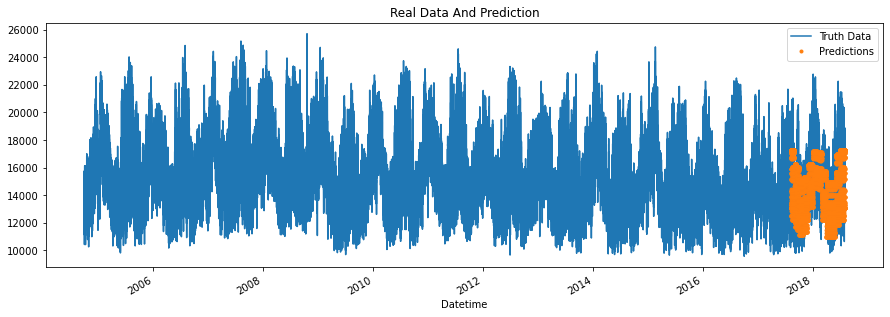

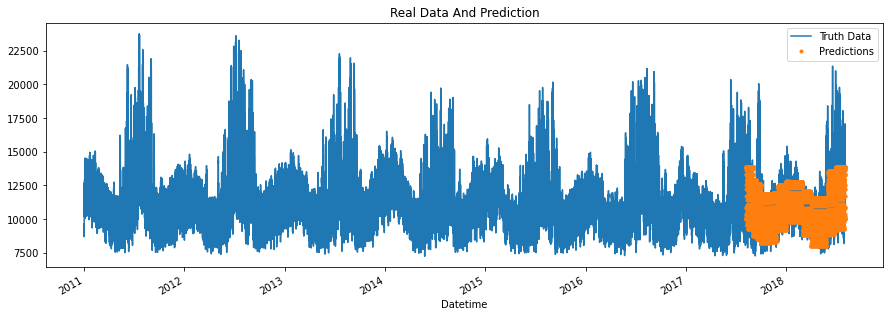

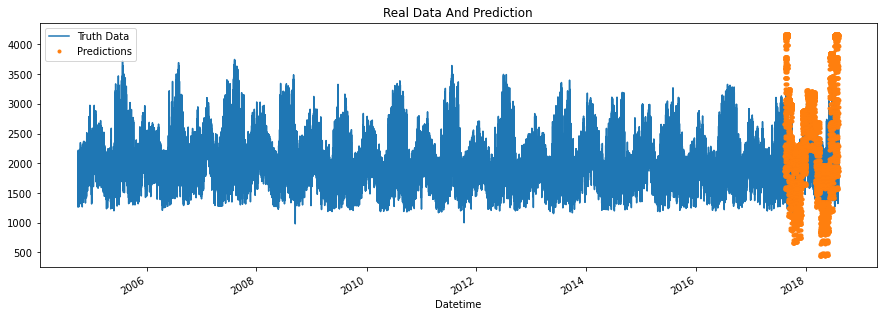

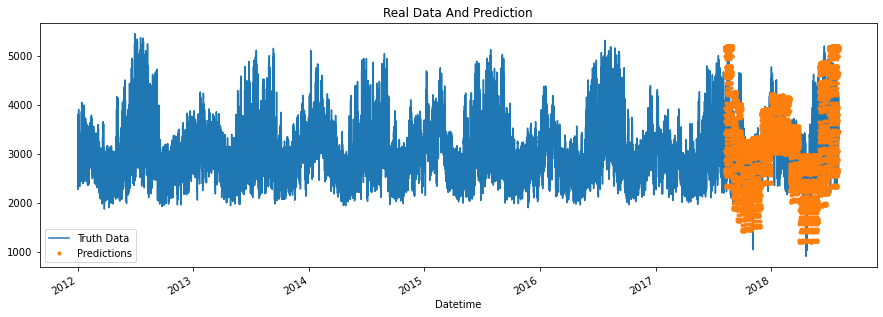

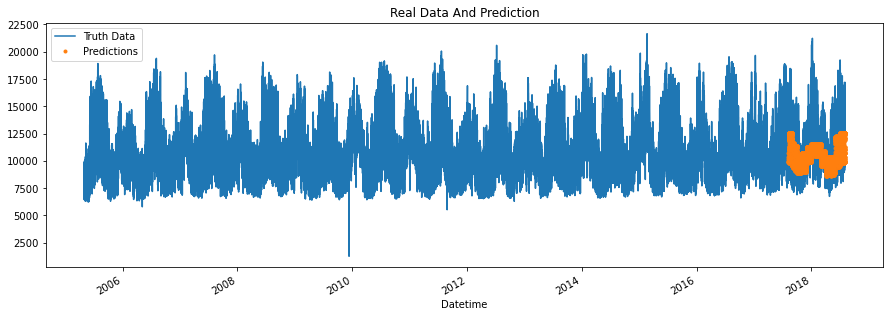

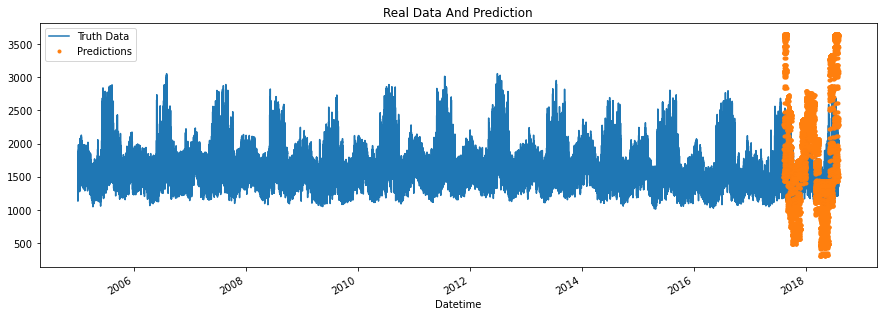

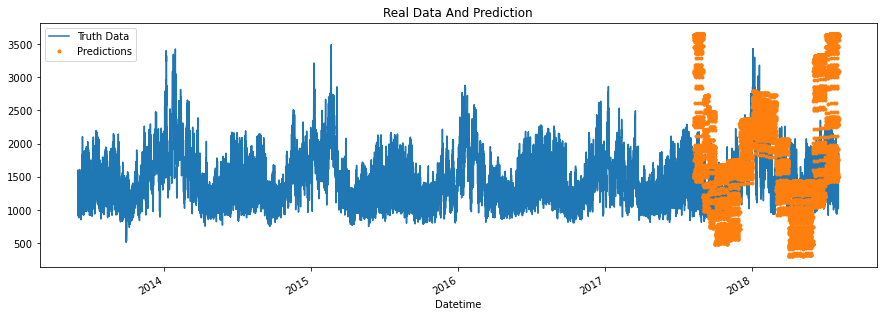

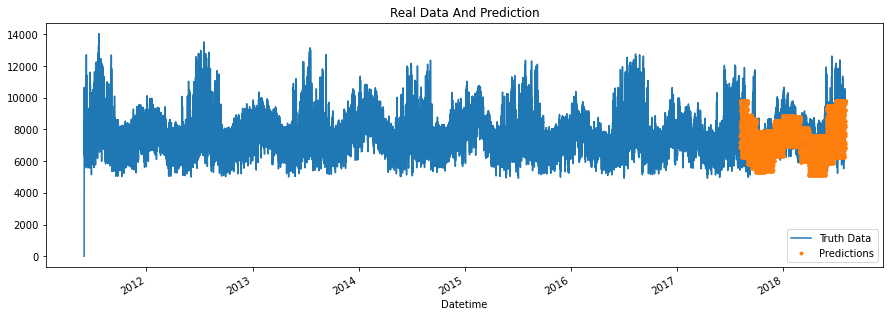

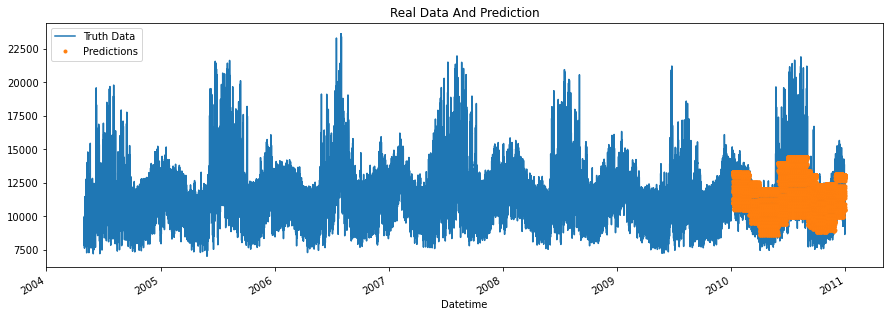

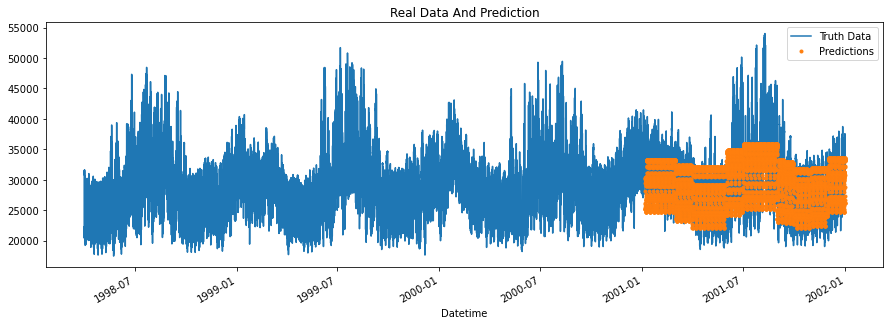

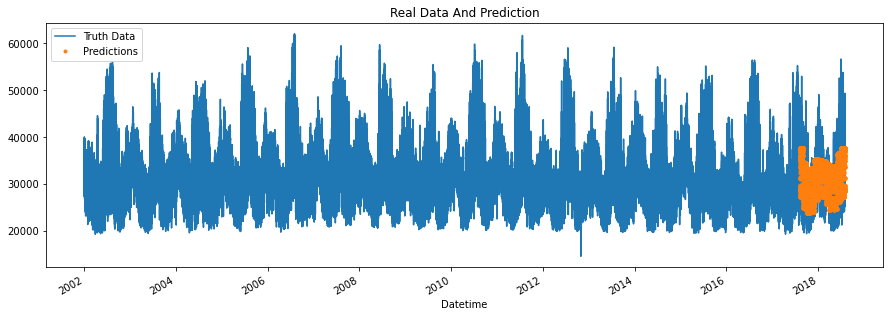

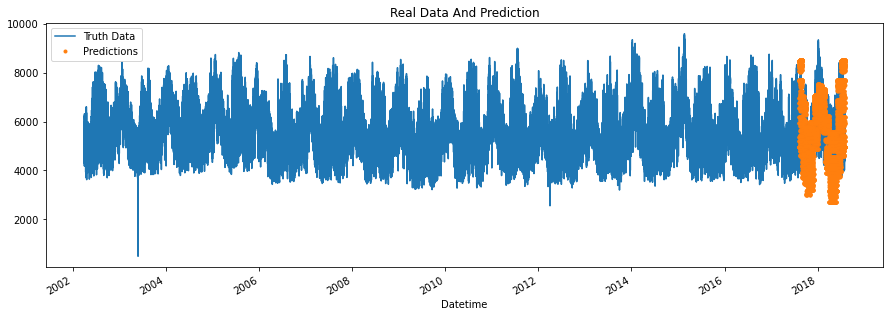

In [78]:
for i in range(1,13):
    dfZone=testDF[testDF['Zone']== i]
    dfZonet=trainDF[trainDF['Zone']== i]
    dfz=pd.concat([dfZonet,dfZone])
    ax = dfz['energy_consumption_MW'].plot(figsize=(15, 5))
    dfz['prediction'].plot(ax=ax, style='.')
    plt.legend(['Truth Data', 'Predictions'])
    ax.set_title('Real Data And Prediction')
    plt.show()
    
     

    

In [79]:
score = np.sqrt(MSE(testDF['energy_consumption_MW'], testDF['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1971.00


In [80]:
zone_dict = [ 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI', 'PJM', 'PJME', 'PJMW']


In [81]:
for i in range(1,13):
    dfZoneT=testDF[testDF['Zone']== i]
    for zone in zone_dict:
        print("zone ", zone)
        break
    zone_dict=zone_dict[1:]
    score = np.sqrt(MSE(dfZoneT['energy_consumption_MW'], dfZoneT['prediction']))
    print(f'RMSE Score on Test set: {score:0.2f}')

zone  AEP
RMSE Score on Test set: 1676.28
zone  COMED
RMSE Score on Test set: 1484.20
zone  DAYTON
RMSE Score on Test set: 705.62
zone  DEOK
RMSE Score on Test set: 638.58
zone  DOM
RMSE Score on Test set: 2109.45
zone  DUQ
RMSE Score on Test set: 715.87
zone  EKPC
RMSE Score on Test set: 779.70
zone  FE
RMSE Score on Test set: 816.60
zone  NI
RMSE Score on Test set: 1587.03
zone  PJM
RMSE Score on Test set: 3553.27
zone  PJME
RMSE Score on Test set: 4278.35
zone  PJMW
RMSE Score on Test set: 1007.66


In [82]:
for i in range(1,13):
    dfZoneT=testDF[testDF['Zone']== i]
    for zone in zone_dict:
        print("zone ", zone)
        break
    zone_dict=zone_dict[1:]
    print(r2_score(dfZoneT['energy_consumption_MW'], dfZoneT['prediction']))
   
    

0.5268646150357593
0.5336364685971011
-2.7436750068095126
-0.10770098850008125
0.2547351876751397
-5.688719831865133
-2.9548654198624873
0.5781853563960643
0.6043420940089137
0.6339029808948271
0.49893954238855165
-0.029257488210318483


# Looking at the worst and best predicted days

# 1. Worst 10 days

In [83]:
testDF['error'] = np.abs(testDF[TARGET] - testDF['prediction'])
testDF['date'] = testDF.index.date
testDF.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2001-08-09    13099.686523
2001-08-08    12654.936523
2001-07-25    11562.603190
2001-08-10    11465.858887
2001-08-07    11413.353190
2001-06-28     9618.177165
2001-07-24     9590.061523
2001-08-06     9119.000814
2001-06-30     8978.788574
2001-06-29     8912.932699
Name: error, dtype: float64

# 2. Best 10 Days

In [84]:
testDF.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

date
2010-04-08    248.946696
2010-03-03    256.378011
2010-03-05    260.510091
2010-11-19    288.467041
2010-03-04    291.216309
2010-11-18    301.725993
2010-11-20    304.035970
2010-02-10    315.976603
2010-05-22    316.953735
2010-05-13    326.369385
Name: error, dtype: float64

# Saving Model 

In [85]:
reg.save_model('modelXGBoost.json')

